<a href="https://colab.research.google.com/github/Viveek1218/Vivek-Patil/blob/main/Breast_Cancer_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: DATA COLLECTION

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.options.display.max_columns = 100

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
data = pd.read_csv("Breast_cancer_data.csv")

In [7]:
# Cell 1
len(data.index), len(data.columns)

(569, 6)

In [8]:
# Cell 2
data.shape

(569, 6)

In [9]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [10]:
data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


# Step-2 EXPLORATORY DATA ANALYSIS

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [12]:
data.isna()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


In [13]:
data.isna().any()

,0
mean_radius,False
mean_texture,False
mean_perimeter,False
mean_area,False
mean_smoothness,False
diagnosis,False


In [14]:
data.isna().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


In [15]:
data = data.dropna(axis='columns')

In [16]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [17]:
data.diagnosis.value_counts()

,count
diagnosis,
1,357
0,212


In [18]:
data.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0


In [19]:
diagnosis_unique = data.diagnosis.unique()

In [20]:
diagnosis_unique

array([0, 1])

# Step-3 DATA VISUALIZATION

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

Text(0.5, 0, 'Diagnosis')

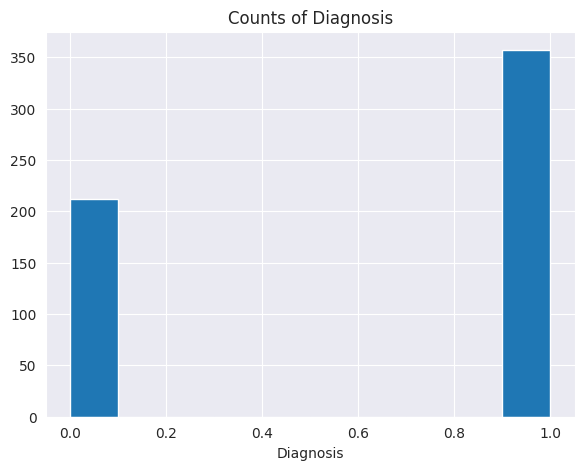

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist( data.diagnosis)
# plt.legend()
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")

# plt.show()

In [31]:
plt.figure(figsize=(5,5))
px.histogram(data, x='diagnosis')


<Figure size 500x500 with 0 Axes>

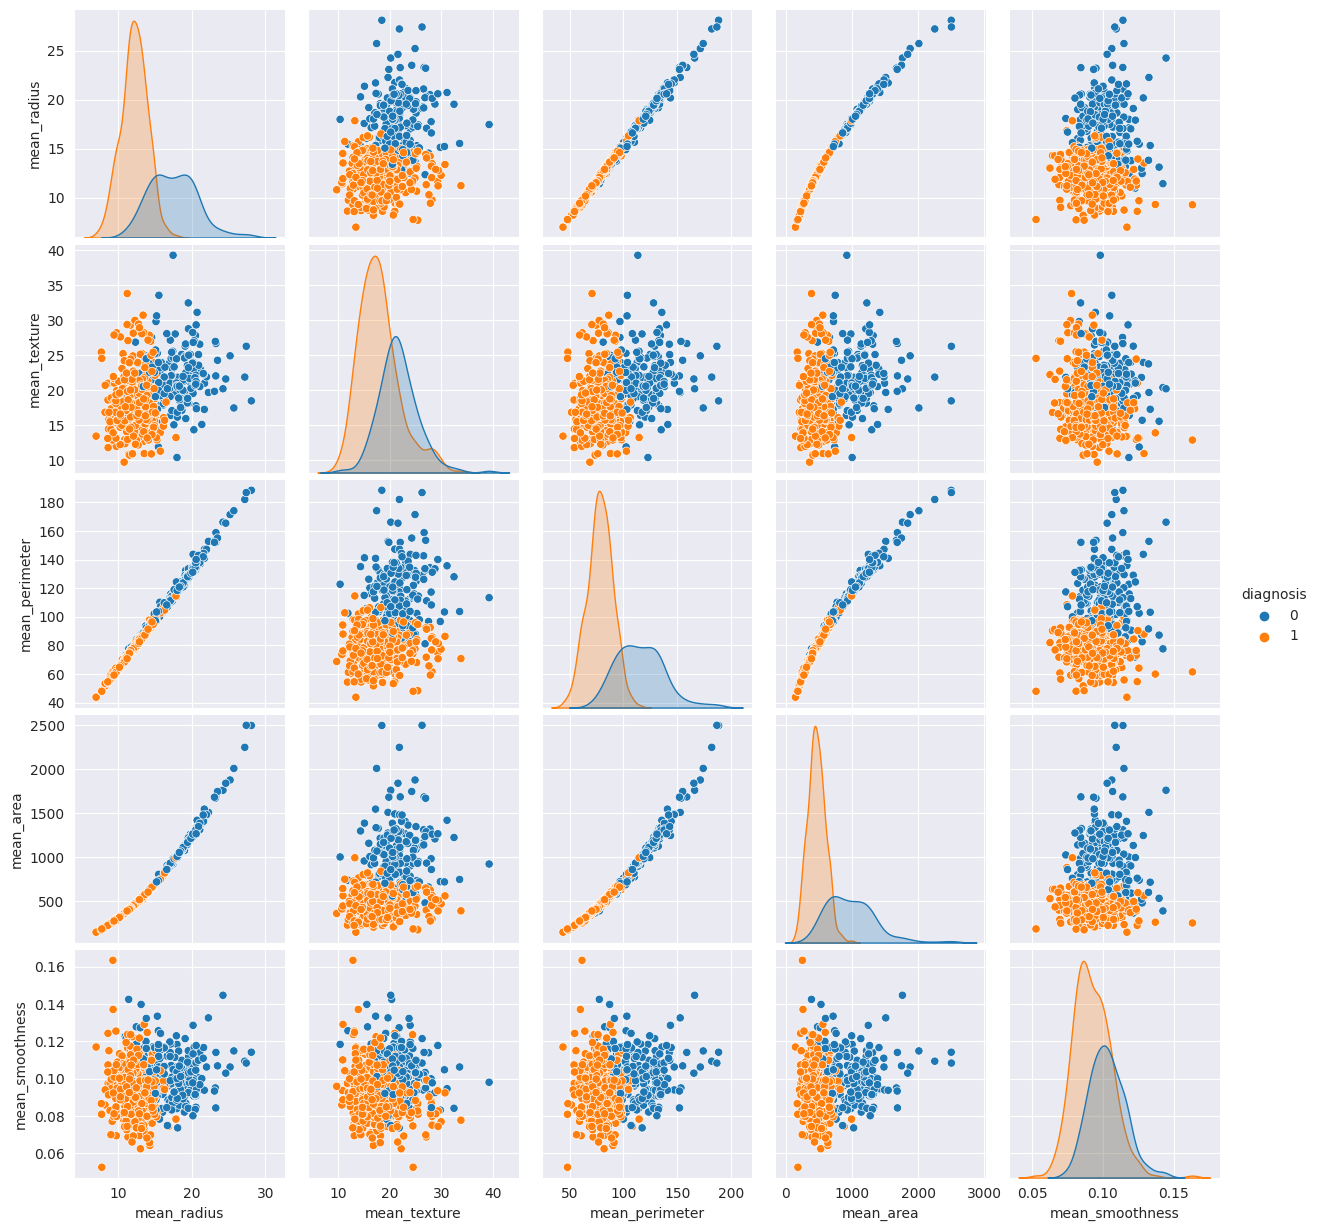

In [ ]:
cols = ["diagnosis", "mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

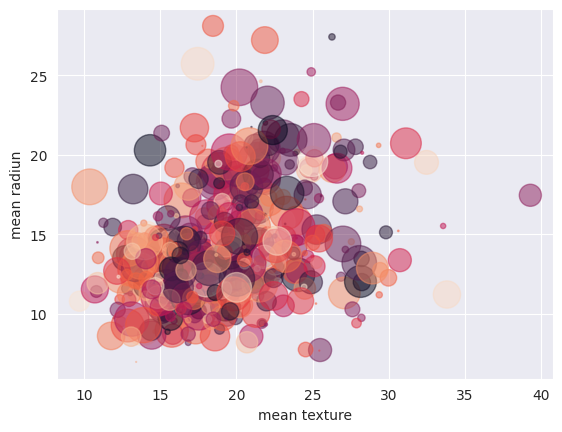

In [32]:
size = len(data['mean_texture'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("mean texture")
plt.ylabel("mean radiun")
plt.scatter(data['mean_texture'], data['mean_radius'], s=area, c=colors, alpha=0.5);

Data Filtering

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
data.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0


In [35]:
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)

In [36]:
data.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0


In [37]:
print(data.diagnosis.value_counts())
print("\n", data.diagnosis.value_counts().sum())

diagnosis
1    357
0    212
Name: count, dtype: int64

 569


In [38]:
cols = ['diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness']
print(len(cols))
data[cols].corr()

6


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560
mean_radius,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581
mean_texture,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389
mean_perimeter,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278
mean_area,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028
mean_smoothness,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000


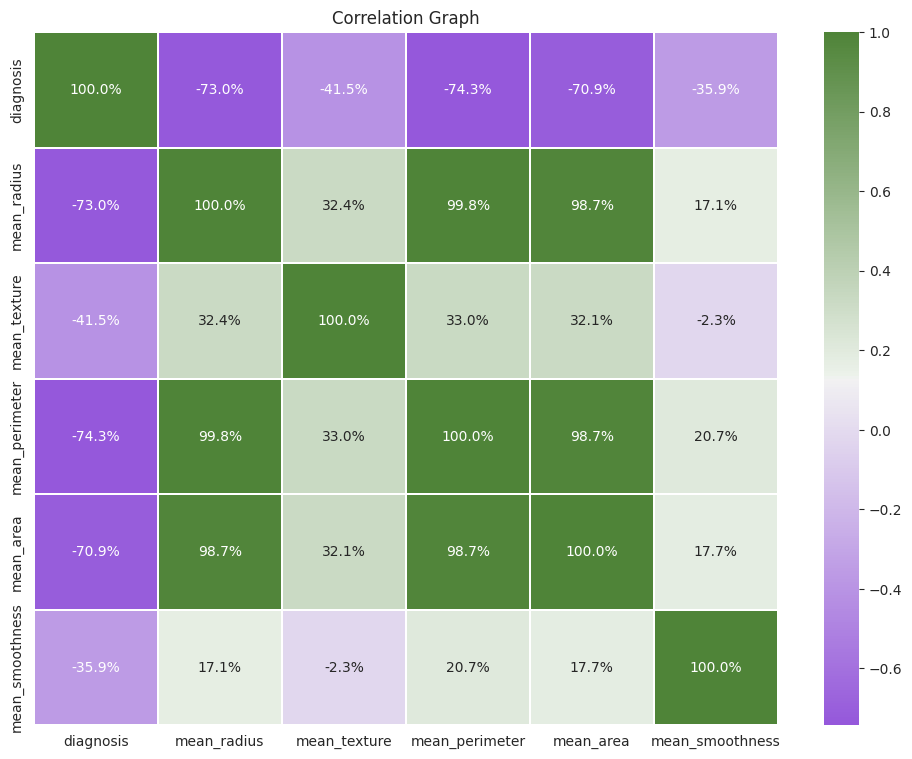

In [39]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

Using, Plotpy Package we can show it in interactive graphs like this

In [40]:
plt.figure(figsize=(5, 5))


fig = px.imshow(data[cols].corr());
fig.show()

<Figure size 500x500 with 0 Axes>

# STEP-4 MODEL IMPLEMENTATION

Preprocessing and model selection

In [41]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

Import machine learning model

In [42]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

Check the Model Accuracy, Errors and it's Validations

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

Feature Selection

In [44]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

Take the dependent and independent feature for prediction

In [45]:
prediction_feature = [ "mean_radius", 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']

targeted_feature = 'diagnosis'

len(prediction_feature)

5

In [66]:
X = data[prediction_feature]
X

print(X.shape)
print(X.values)

(569, 5)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 8.581e+02 8.455e-02]
 [2.060e+01 2.933e+01 1.401e+02 1.265e+03 1.178e-01]
 [7.760e+00 2.454e+01 4.792e+01 1.810e+02 5.263e-02]]


In [65]:
y = data.diagnosis
y

print(y.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Splite the dataset into TrainingSet and TestingSet by 33% and set the 15 fixed records

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

print(X_train)
print(X_test)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
274        17.93         24.48          115.20      998.9          0.08855
189        12.30         15.90           78.83      463.7          0.08080
158        12.06         12.74           76.84      448.6          0.09311
257        15.32         17.27          103.20      713.3          0.13350
486        14.64         16.85           94.21      666.0          0.08641
..           ...           ...             ...        ...              ...
85         18.46         18.52          121.10     1075.0          0.09874
199        14.45         20.22           94.49      642.7          0.09872
156        17.68         20.74          117.40      963.7          0.11150
384        13.28         13.72           85.79      541.8          0.08363
456        11.63         29.29           74.87      415.1          0.09357

[381 rows x 5 columns]
     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
3

Perform Feature Standard Scalling

In [49]:
# Scale the data to keep all the values in the same magnitude of 0 -1

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# STEP-5 ML MODEL SELECTING AND MODEL PREDPREDICTION

Model Building

In [50]:
def model_building(model, X_train, X_test, y_train, y_test):
    """

    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """

    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)

    return (score, accuracy, predictions)

Making dictionary for multiple models for bulk predictions

In [51]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}

print(models_list)

{'LogisticRegression': LogisticRegression(), 'RandomForestClassifier': RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), 'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy', random_state=0), 'SVC': SVC()}


Before, sending it to the prediction check the key and values to store it's values in DataFrame below.

In [63]:
print(list(models_list.keys()))
print(list(models_list.values()))

print(zip(list(models_list.keys()), list(models_list.values())))

['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


Train the model one by one and show the classification report of particular models wise

In [53]:
# Let's Define the function for confision metric Graphs

def cm_metrix_graph(cm):

    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

In [54]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):

    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )

    print("\n\nClassification Report of '"+ str(name), "'\n")

    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])

    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))


df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        73
           1       0.92      0.96      0.94       115

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.95      0.81      0.87        73
           1       0.89      0.97      0.93       115

    accuracy                           0.91       188
   macro avg       0.92      0.89      0.90       188
weighted avg       0.91      0.91      0.91       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        73
           1       0.88      0.96      0.92       115

    accuracy            

In [55]:
print(len(confusion_matrixs))

4


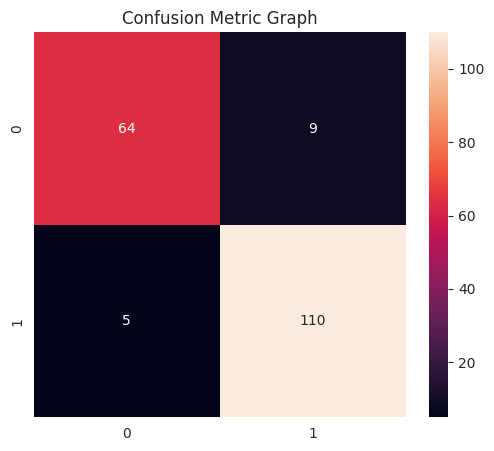

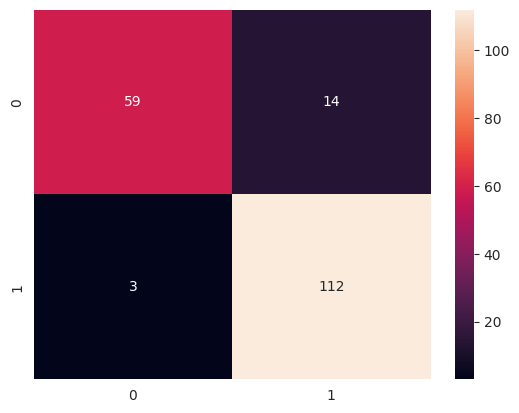

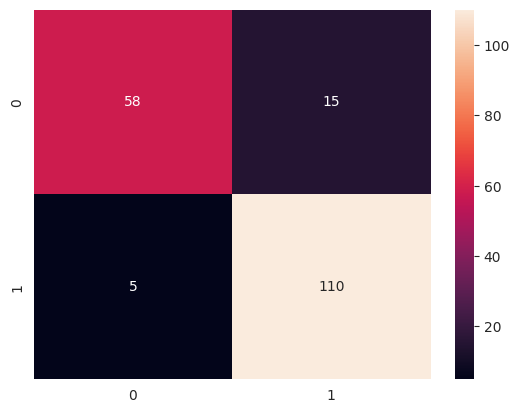

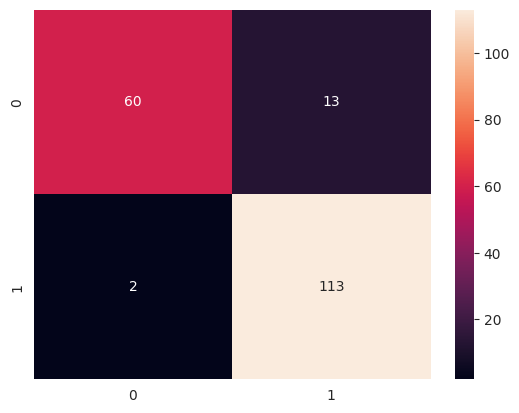

In [62]:
plt.figure(figsize=(6, 5))
plt.title("Confusion Metric Graph")

# Iterate through each confusion matrix in confusion_matrixs
for cm in confusion_matrixs:
    # Show The Metrics Graph
    cm_metrix_graph(cm) # Call the Confusion Metrics Graph

While Predicting we can store model's score and prediction values to new generated dataframe

In [67]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.939633,0.925532,92.55%
1,RandomForestClassifier,0.994751,0.909574,90.96%
2,DecisionTreeClassifier,1.000000,0.893617,89.36%
3,SVC,0.947507,0.920213,92.02%


In [68]:
df_pred.sort_values('score', ascending=False)

df_pred.sort_values('accuracy_score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.939633,0.925532,92.55%
3,SVC,0.947507,0.920213,92.02%
1,RandomForestClassifier,0.994751,0.909574,90.96%
2,DecisionTreeClassifier,1.000000,0.893617,89.36%


K fold applying


In [73]:
len(data)
print(len(X))

569


Let's define a function for cross validation scorring for multiple ML models

In [79]:
def cross_val_scorring(model):
    # Initialize K folds.
    kFold = KFold(n_splits=5)  # define 5 different data folds

    err = []

    for train_index, test_index in kFold.split(data):
        # Data Splitting via fold indexes
        X_train = data[prediction_feature].iloc[train_index, :]  # train_index = rows and all columns for Prediction_features
        y_train = data[targeted_feature].iloc[train_index]  # all targeted features trains

        X_test = data[prediction_feature].iloc[test_index, :]  # testing all rows and cols
        y_test = data[targeted_feature].iloc[test_index]  # all targeted tests

        # Model Fitting, Prediction And Other stuff
        # Passing X_train, X_test, y_train, y_test to model_building
        (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test)

        model.fit(data[prediction_feature], data[targeted_feature])

        score = model.score(X_train, y_train)

        predictions = model.predict(data[prediction_feature])  # Corrected indentation
        accuracy = accuracy_score(predictions, data[targeted_feature])
        print("\nFull-Data Accuracy:", round(accuracy, 2))
        print("Cross Validation Score of'" + str(name), "'\n")

        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))

        print("Score:", round(np.mean(err), 2))

Call the function to know the cross validation function by mean for our select model predictions.

In [80]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scorring(model)


Full-Data Accuracy: 0.91
Cross Validation Score of'LogisticRegression '

Score: 0.93

Full-Data Accuracy: 0.91
Cross Validation Score of'LogisticRegression '

Score: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/


Full-Data Accuracy: 0.91
Cross Validation Score of'LogisticRegression '

Score: 0.92

Full-Data Accuracy: 0.91
Cross Validation Score of'LogisticRegression '



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Score: 0.91

Full-Data Accuracy: 0.91
Cross Validation Score of'LogisticRegression '

Score: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Full-Data Accuracy: 0.99
Cross Validation Score of'RandomForestClassifier '

Score: 1.0

Full-Data Accuracy: 0.99
Cross Validation Score of'RandomForestClassifier '

Score: 1.0

Full-Data Accuracy: 0.99
Cross Validation Score of'RandomForestClassifier '

Score: 1.0

Full-Data Accuracy: 0.99
Cross Validation Score of'RandomForestClassifier '

Score: 1.0

Full-Data Accuracy: 0.99
Cross Validation Score of'RandomForestClassifier '

Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9

Full-Data Accuracy: 0.89
Cross Validation Sc